<h1 align = "center"> Compte rendu </h1>

<h3 align = "center"> Réalisé par : El Ghalbzouri Akram </h3>
<h3 align = "center"> MASTER : AIDC </h3>

# **Introduction:**

L'Analyse en Composantes Principales (ACP) est une technique statistique puissante largement utilisée pour explorer et analyser des ensembles de données complexes. Son objectif principal est de transformer un ensemble de variables interdépendantes en un ensemble de variables non corrélées, appelées composantes principales, permettant ainsi de réduire la dimensionnalité des données tout en préservant autant que possible les variations significatives.

Dans le cadre de cette étude, nous entreprenons une ACP des notes des étudiants dans différentes matières. L'ampleur de la diversité dans les performances des étudiants dans les différentes disciplines offre une opportunité d'appliquer cette méthode afin de découvrir des structures sous-jacentes, d'identifier des tendances, et de révéler des relations potentielles entre les matières.

Cette analyse vise à répondre à plusieurs questions clés:
- Existe-t-il des corrélations entre les matières d'étude?
- Quelles sont les matières qui contribuent le plus à la variance des notes des étudiants?
- Les étudiants peuvent-ils être regroupés en fonction de leurs performances dans les matières?

À travers ce compte rendu, nous présenterons en détail le processus de l'ACP, des commandes spécifiques générées par RStudio, les résultats obtenus, et enfin, les interprétations pertinentes. Cela nous permettra de mieux comprendre les relations complexes entre les différentes matières et d'identifier des motifs significatifs qui peuvent orienter des prises de décision éclairées dans le contexte éducatif.

L'analyse en composantes principales représente une approche analytique précieuse pour explorer et extraire des informations exploitables à partir de données multidimensionnelles, et nous sommes impatients de partager les résultats de cette exploration avec vous dans le reste de ce rapport.


# **Analyse Exploratoire des Données (AED) :**

Avant d'entamer l'Analyse en Composantes Principales (ACP) des notes des étudiants, une exploration approfondie des données s'impose. L'Analyse Exploratoire des Données (AED) constitue la première étape de cette démarche analytique. Elle vise à dévoiler les caractéristiques fondamentales des notes, à identifier des tendances émergentes, et à anticiper les opportunités et défis inhérents à l'ensemble de données. Cette brève analyse préliminaire jettera les bases nécessaires à une ACP éclairée, permettant ainsi une compréhension plus profonde des relations entre les matières étudiées.

## Importation des données  

D'abord, on importe le ficher excel qui contient les données des étudiants

In [24]:
# On charge le package readxl qui lire les fichiers excel
library(readxl)

# Lire le fichier
data <- as.data.frame(read_excel("data/Marks.xlsx"))

In [74]:
# On voir est ce que les données sont bien importer
head(data[c(1:6)])

,l_franco,l_fr,l_anglo,l_ang,Peinture,Musique
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E1,11,10,10,12,15,16
E2,10,12,11,10,10,13
E3,14,15,13,11,10,10
E4,13,14,10,11,11,12
E5,8,9,10,9,9,8
E6,15,16,13,12,9,9


Pour une meilleure visualisation des données dans les plots, on va changer les noms des variables en des noms plus courtes 

In [26]:
names(data) <- c(
  "Etudiants", "l_franco", "l_fr",
  "l_anglo", "l_ang", "Peinture", "Musique"
)

## Statistiques descriptives

Maintenant on va afficher des informations sur les données tel que le type de chaque colonne, le moyen, l’écart types, etc... 

In [27]:
summary(data)

  Etudiants            l_franco         l_fr          l_anglo    
 Length:10          Min.   : 8.0   Min.   : 9.00   Min.   : 8.0  
 Class :character   1st Qu.:10.0   1st Qu.:12.00   1st Qu.:10.0  
 Mode  :character   Median :12.0   Median :12.00   Median :10.5  
                    Mean   :11.7   Mean   :12.50   Mean   :11.6  
                    3rd Qu.:13.0   3rd Qu.:13.75   3rd Qu.:13.0  
                    Max.   :15.0   Max.   :16.00   Max.   :16.0  
     l_ang          Peinture        Musique     
 Min.   : 9.00   Min.   : 9.00   Min.   : 8.00  
 1st Qu.:10.25   1st Qu.: 9.25   1st Qu.: 9.25  
 Median :11.00   Median :10.50   Median :12.00  
 Mean   :11.60   Mean   :11.40   Mean   :11.70  
 3rd Qu.:12.00   3rd Qu.:12.75   3rd Qu.:13.00  
 Max.   :16.00   Max.   :16.00   Max.   :16.00  

On voit qu'on a la colon Étudiants qui est de type character, pour faire l'ACP, on ne va pas nécessiter cette colonne, alors on va la supprimer.

Mais avant de cà, on va affecter les nomes à chaque ligne d’après la colonne

In [28]:
rownames(data) <- data$Etudiants

In [29]:
# Supprimer la première colonne et conserver les noms de lignes
data <- data[, -1]

Maintenant qu'on a préparer notre données, on va visualiser les données pour les comprendre

On commence par un box plot :

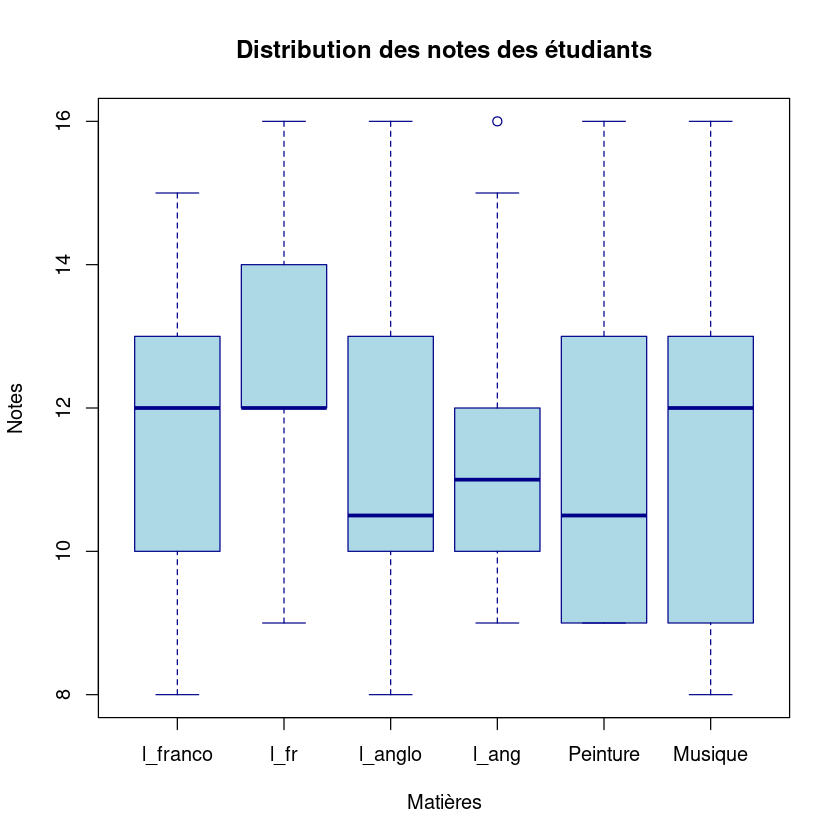

In [30]:
boxplot(data,
  main = "Distribution des notes des étudiants",
  xlab = "Matières",
  ylab = "Notes",
  col = "lightblue",
  border = "darkblue"
)

D’après ce boxplot, on peut voir que les variables ont presque la même distribution, entre 9 et 14, avec la présence d'un outlier dans la variable l_ang 

Maintenant on plot le boxplot par rapport au étudiants :

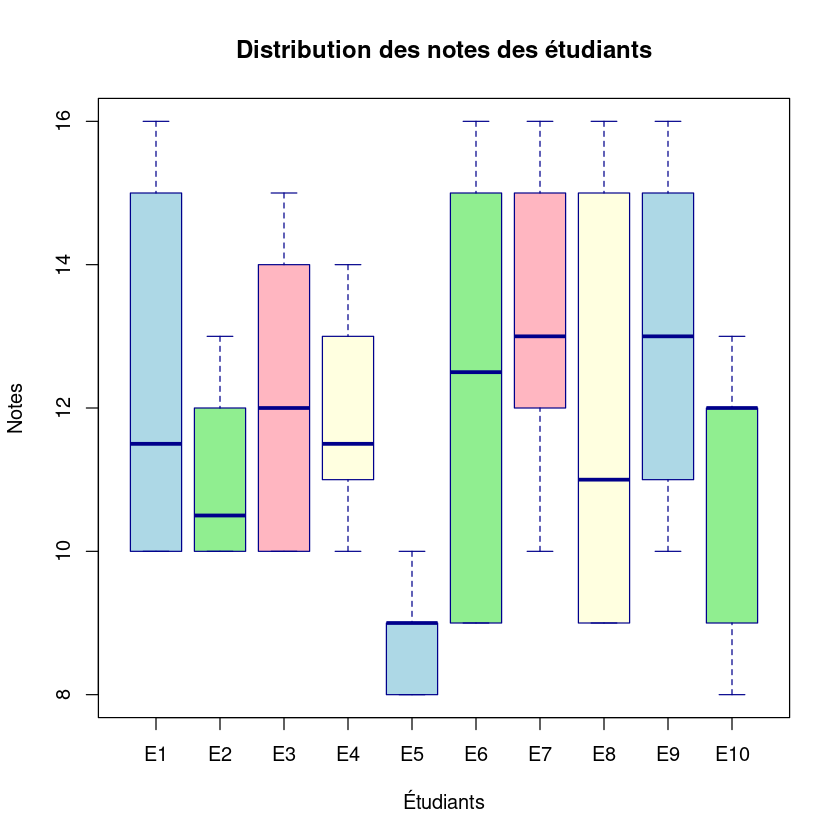

In [31]:
boxplot(t(data),
  main = "Distribution des notes des étudiants",
  xlab = "Étudiants",
  ylab = "Notes",
  col = c("lightblue", "lightgreen", "lightpink", "lightyellow"),
  border = "darkblue"
)


Ici on voit que presque tous les notes de tout les étudiants varient de la même façon, sauf pour l’étudiant E5 qui varie d'une façon différente des autres.

## Corrélation des variables

Maintenant on va voir les corrélation entre les variables, pour cela on va d'abord télécharger les packages nécessaires

In [75]:
library(car)
library(corrplot)

On construit la matrice de corrélation : 

In [48]:
cor_mat <- cor(data)
(cor_mat)

,l_franco,l_fr,l_anglo,l_ang,Peinture,Musique
l_franco,1.00000000,0.8636665,-0.1221704,-0.13419913,0.10246549,0.05830602
l_fr,0.86366647,1.0000000,0.2673064,0.11293273,-0.20562034,-0.18645201
l_anglo,-0.12217039,0.2673064,1.0000000,0.85393880,-0.28082192,-0.29746505
l_ang,-0.13419913,0.1129327,0.8539388,1.00000000,0.01128553,-0.02154416
Peinture,0.10246549,-0.2056203,-0.2808219,0.01128553,1.00000000,0.90220170
Musique,0.05830602,-0.1864520,-0.2974651,-0.02154416,0.90220170,1.00000000


Après l'affichage, on peut voir qu il'y a des forts corrélations entre des variables comme l_franco et l_fr avec une valeur de $0.86$, aussi entre l_anglo et l_ang d'une valeur égale a $0.85$, et enfin entre peinture et musique d'une valeur de $0.9$    

Pou une meilleure visualisation, on va afficher la matrice colorié : 

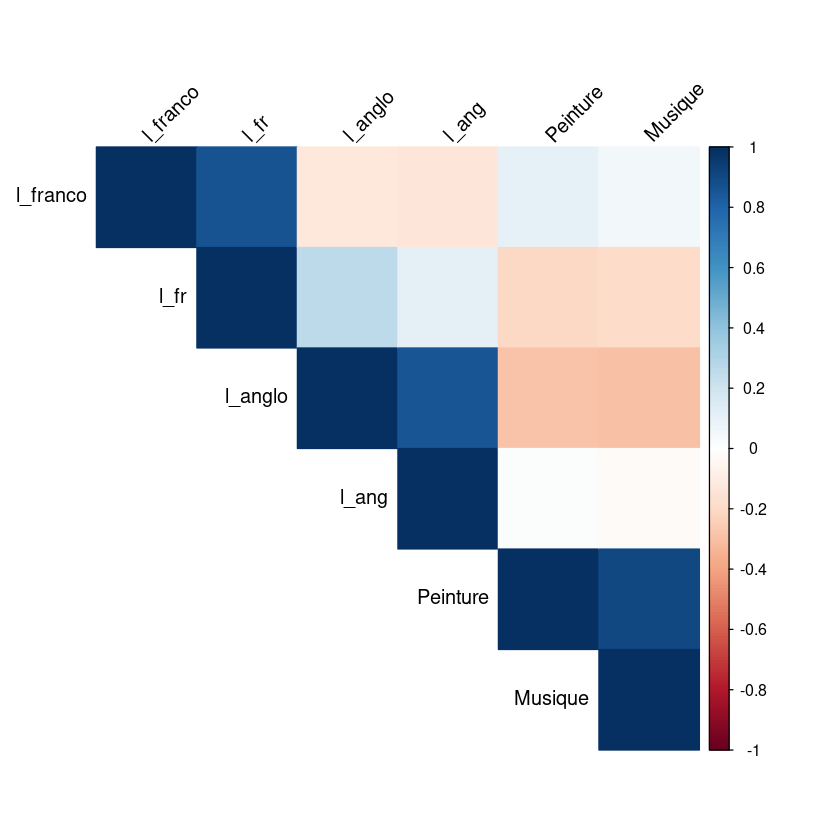

In [34]:
corrplot(cor_mat,
  method = "color",
  type = "upper",
  tl.col = "black",
  tl.srt = 45
)

Donc ici on voit clairement les corrélations entre nos variables.

## Test de Bartlett

Le test de sphéricité de Bartlett a de but pour évaluer si la matrice des corrélations de vos variables diffère significativement de la matrice identité, ce qui indiquerait une non-corrélation globale des variables.

In [76]:
library(psych)
cortest.bartlett(cor_mat, n = 100)

$chisq
[1] 607.7893

$p.value
[1] 7.855057e-120

$df
[1] 15

Une valeur de $\kappa^2$ trop élevé et une valeur $p_{value} < 0.05$ est suffisant pour rejeter l’hypothèse nulle qui dit que notre matrice de corrélation rassemble a la matrice d’identité, donc on assure qu'on a une corrélation entre nos variables, ce qui nous permettre de faire l'ACP  

# **Analyse en composant principales (ACP)**

Après avoir faire l'analyse descriptive et après qu'on a comprendre nos variables en termes de variances, distributions et corrélations, on peut maintenant commence l'Analyse en composent principals (ACP) pour réduire les dimensions de notre données, grouper les variables et comprendre mieux le comportement de notre individus en fonction des nouveaux variables.

D'abord on charge les packages qu'on va utiliser pour faire l'analyse : 

In [36]:
library(factoextra)
library(FactoMineR)

On faire la composition de nos données avec la fonction suivante :  

In [37]:
data.acp <- PCA(data, graph = FALSE)

On voir les resultats de l'ACP : 

In [38]:
data.acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.31812316,38.6353859,38.63539
comp 2,1.83380859,30.5634765,69.19886
comp 3,1.60223704,26.7039507,95.90281
comp 4,0.13416022,2.2360037,98.13882
comp 5,0.08971985,1.4953309,99.63415
comp 6,0.02195114,0.3658523,100.00000


Donc on remarque que les trois premières composantes ont des valeurs propres plus élevé par rapport au autres, et ils expliquent une pourcentage importante ($95.9\%$) de variance.

On peut les voir avec un histogramme : 

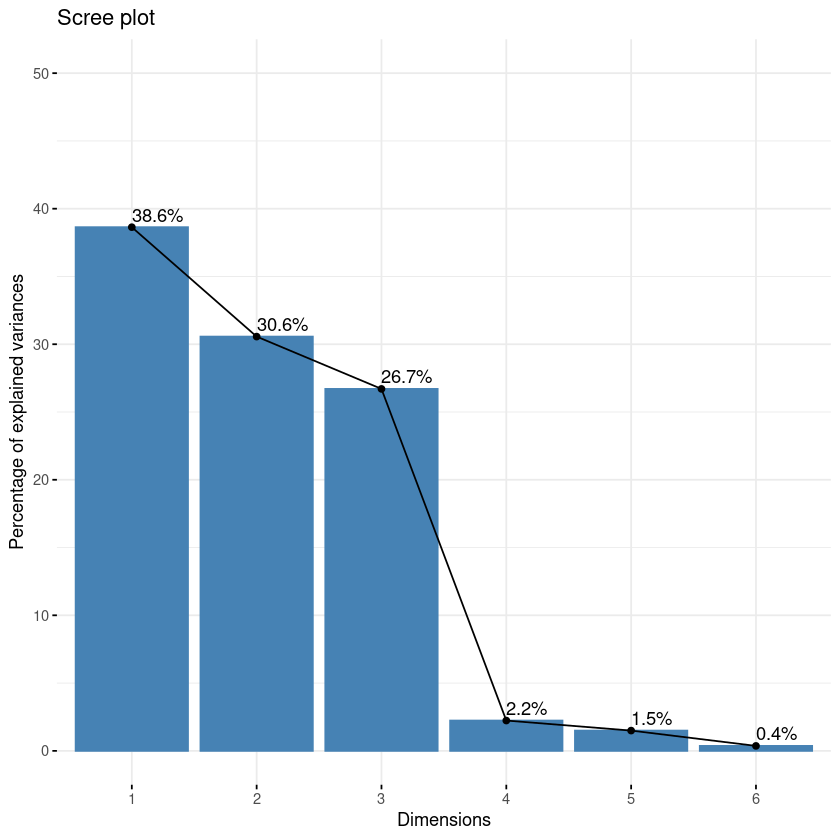

In [39]:
# affichage des composantes de l'ACP avec le pourcentage de chacun
fviz_eig(data.acp, addlabels = TRUE, ylim = c(0, 50))

Donc il suffit de prendre les trois premiers composantes pour expliquer la variance de nos variables.

## Contribution des variables

Et maintenant on va voir la contribution des variables a chaque composant 

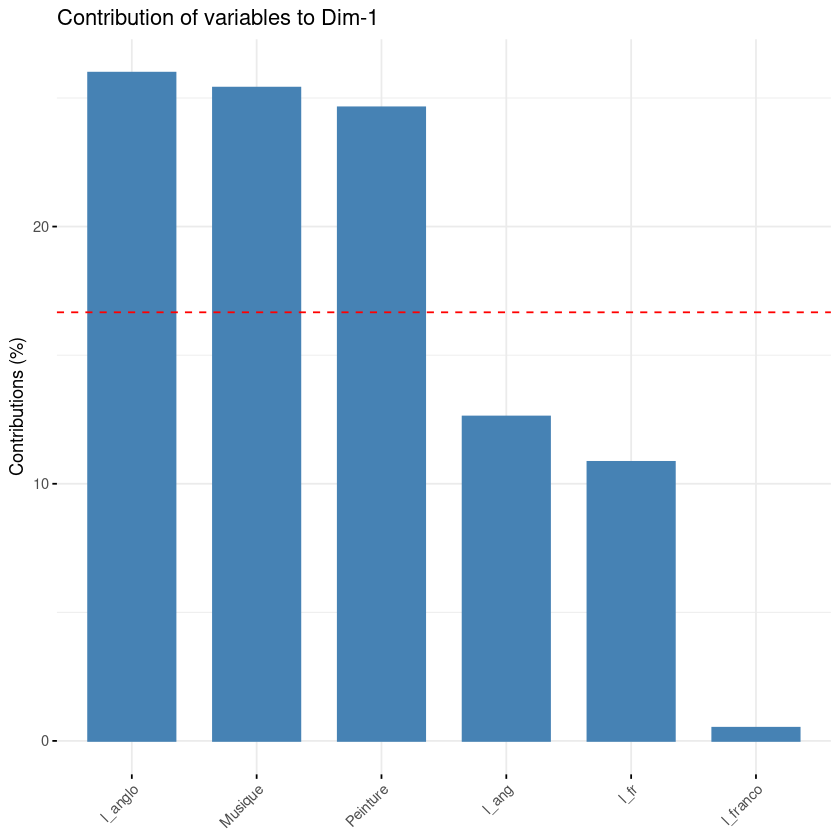

In [40]:
fviz_contrib(data.acp, choice = "var", axes = 1, top = 10)

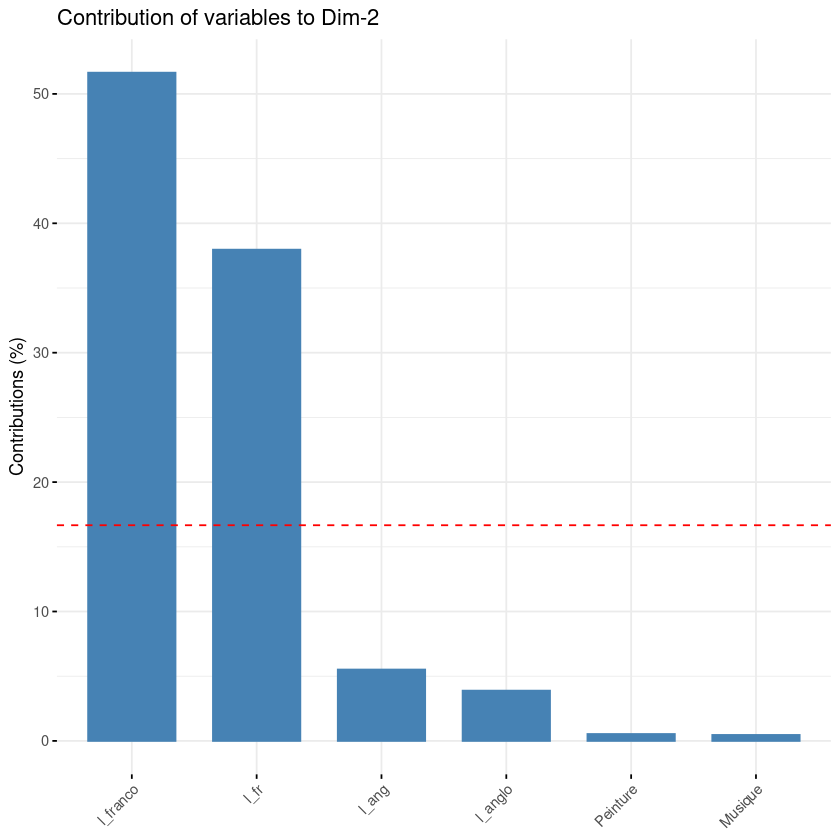

In [41]:
fviz_contrib(data.acp, choice = "var", axes = 2, top = 10)

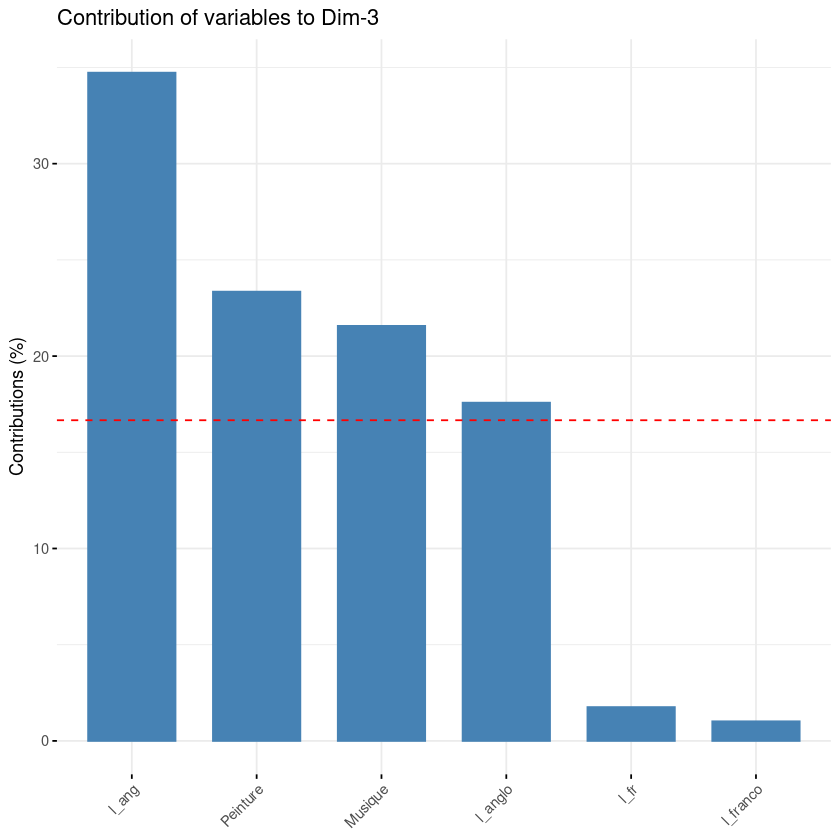

In [42]:
fviz_contrib(data.acp, choice = "var", axes = 3, top = 10)

## Contribution des individus

On va faire le même travail pour les individus

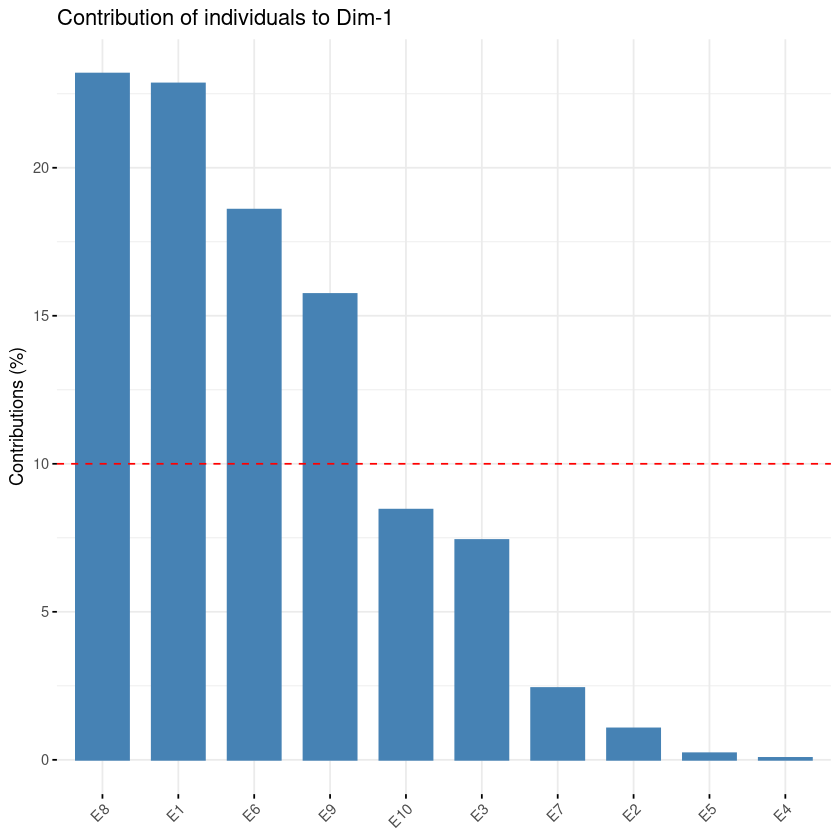

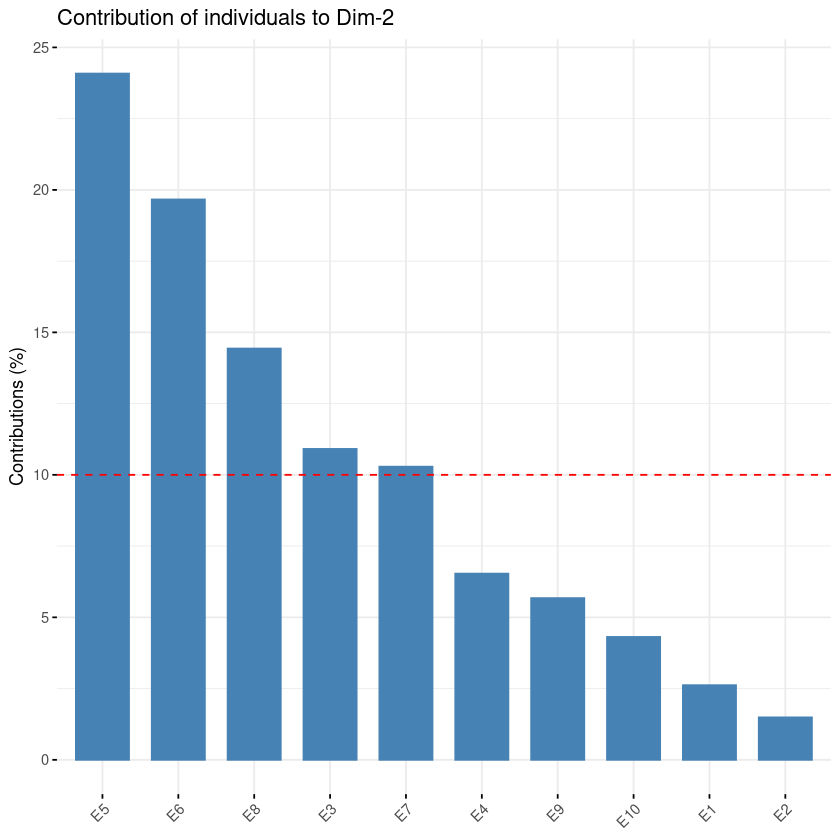

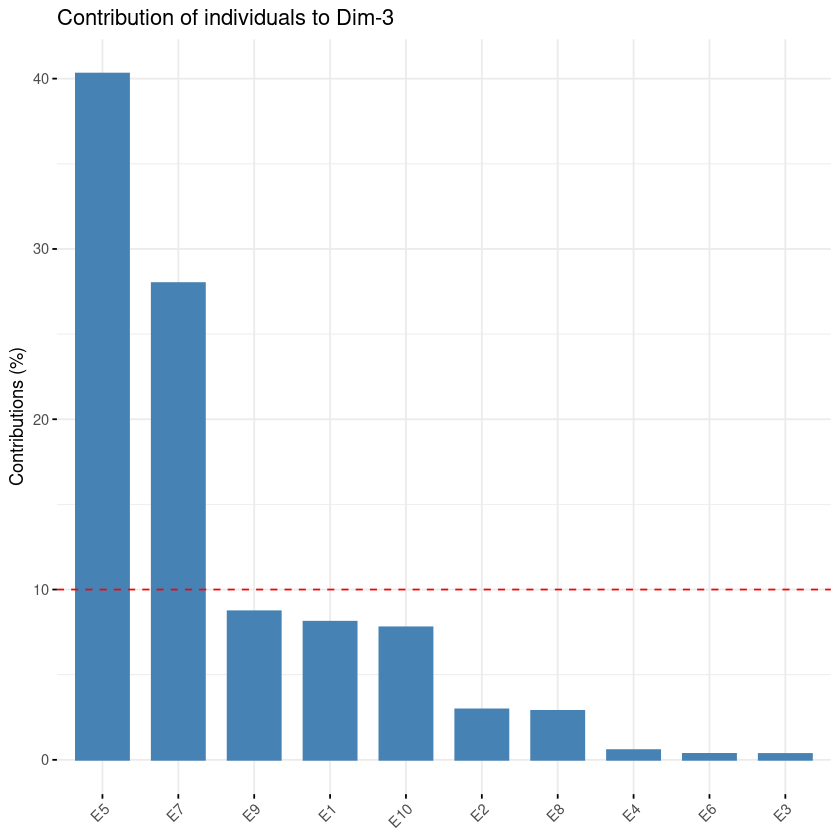

In [43]:
fviz_contrib(data.acp, choice = "ind", axes = 1, top = 10)
fviz_contrib(data.acp, choice = "ind", axes = 2, top = 10)
fviz_contrib(data.acp, choice = "ind", axes = 3, top = 10)


Maintenant on va combiner les deux dans un biplot : 

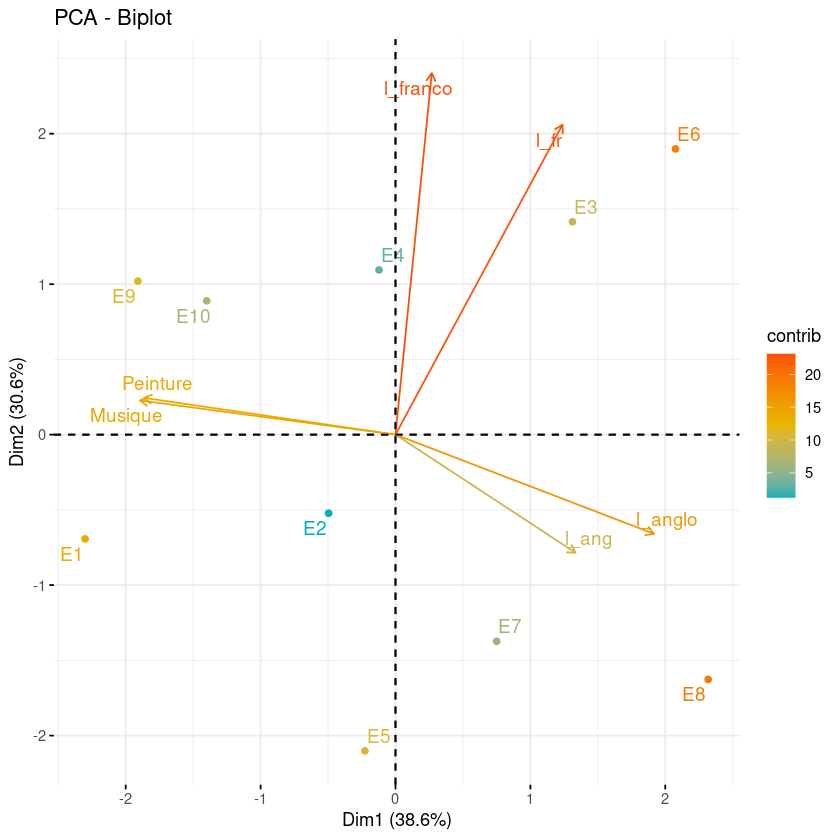

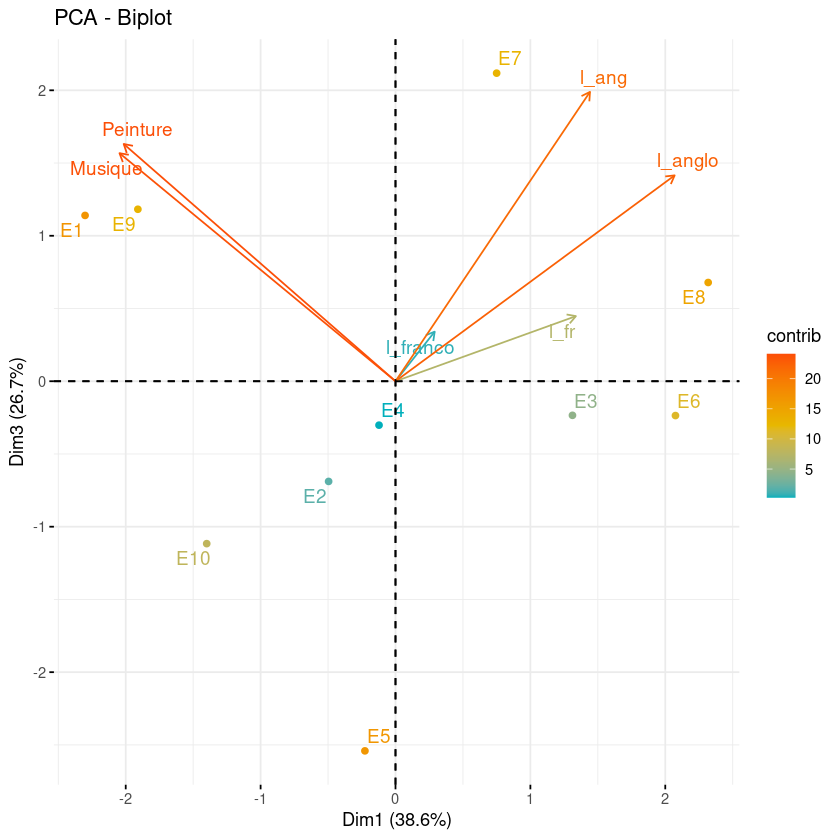

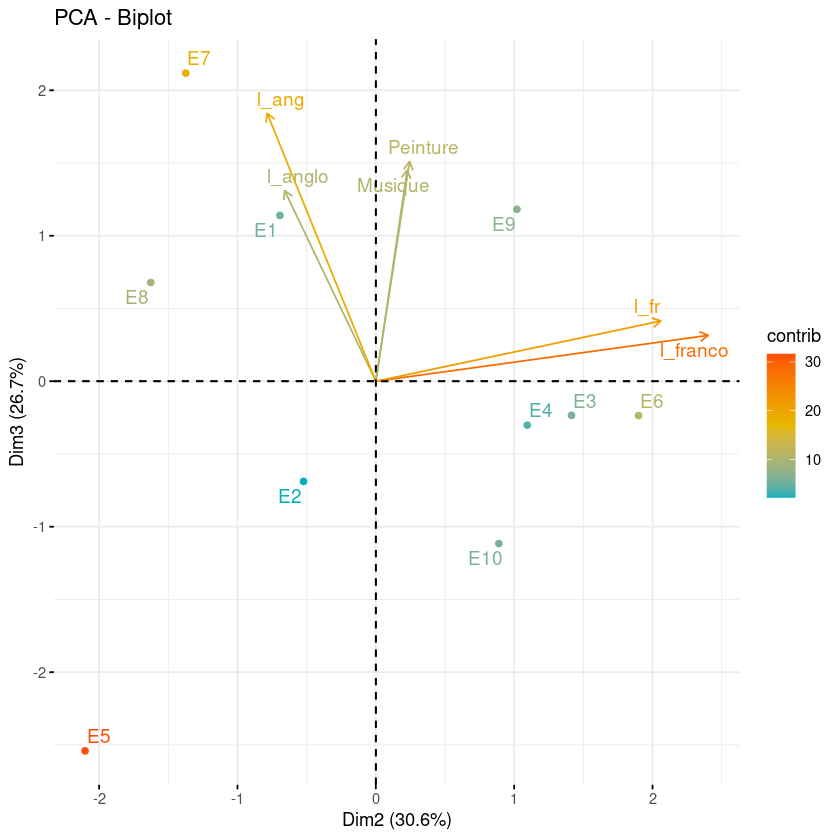

In [44]:
fviz_pca(data.acp,
  col.var = "contrib",
  col.ind = "contrib",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE, axes = c(1, 2)
)

fviz_pca(data.acp,
  col.var = "contrib",
  col.ind = "contrib",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE, axes = c(1, 3)
)

fviz_pca(data.acp,
  col.var = "contrib",
  col.ind = "contrib",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE, axes = c(2, 3)
)


D’après ces graphes on peut déjà voir qu'il ya des individus qui ne contribue a aucune composante, comme E2 et E10.

## Qualité de représentation des variables et individus

On va voir pour chaque variable et individu, la qualité de sa représentation dans les composantes, on va utiliser le biplot avec la méthode cos2.

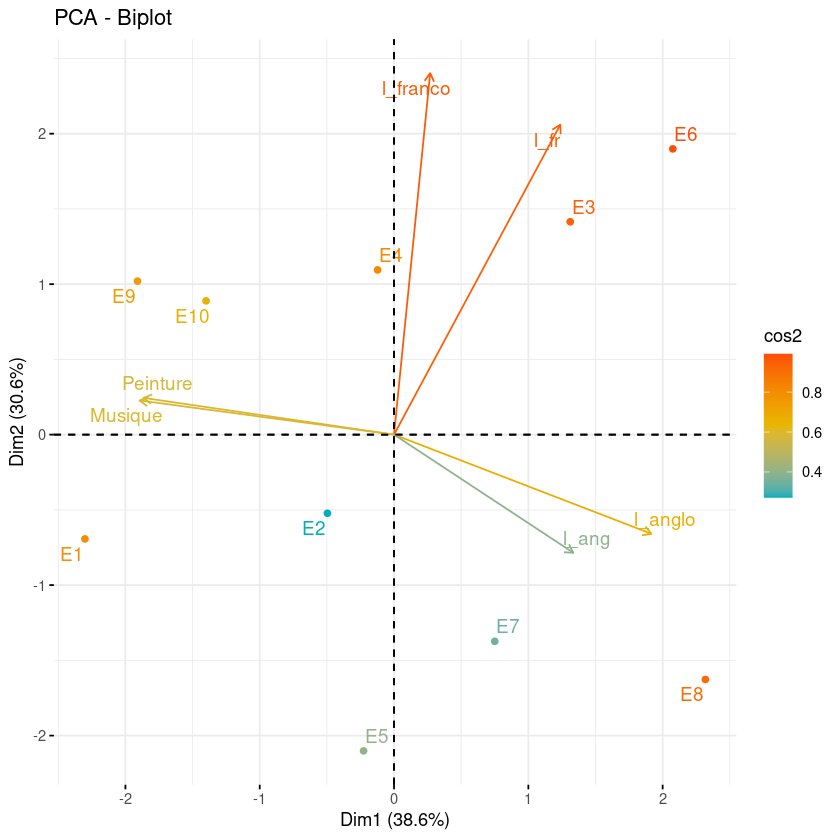

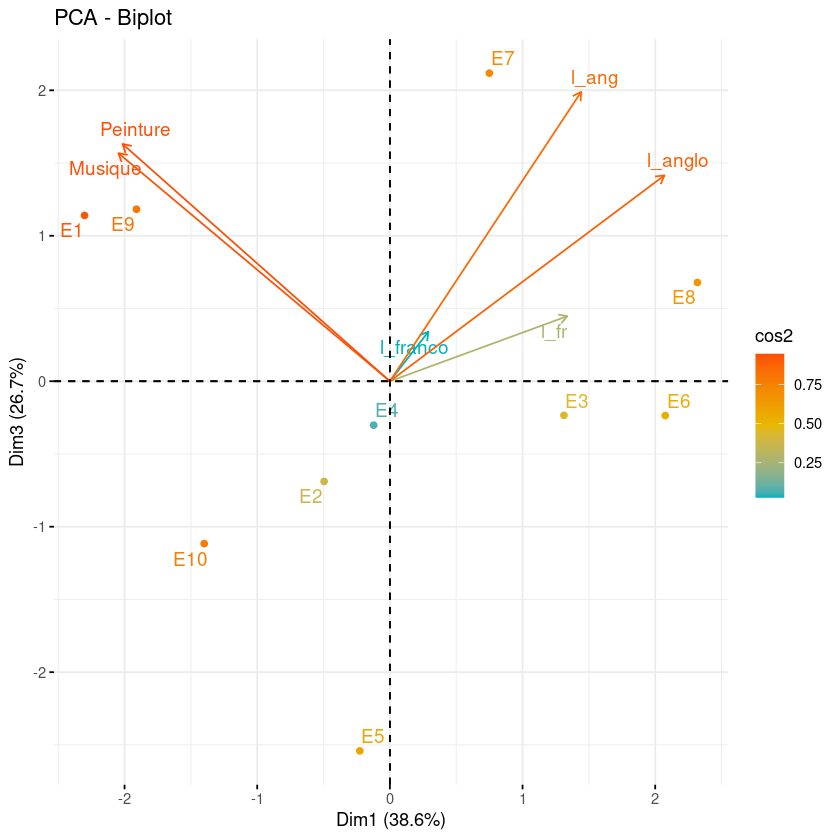

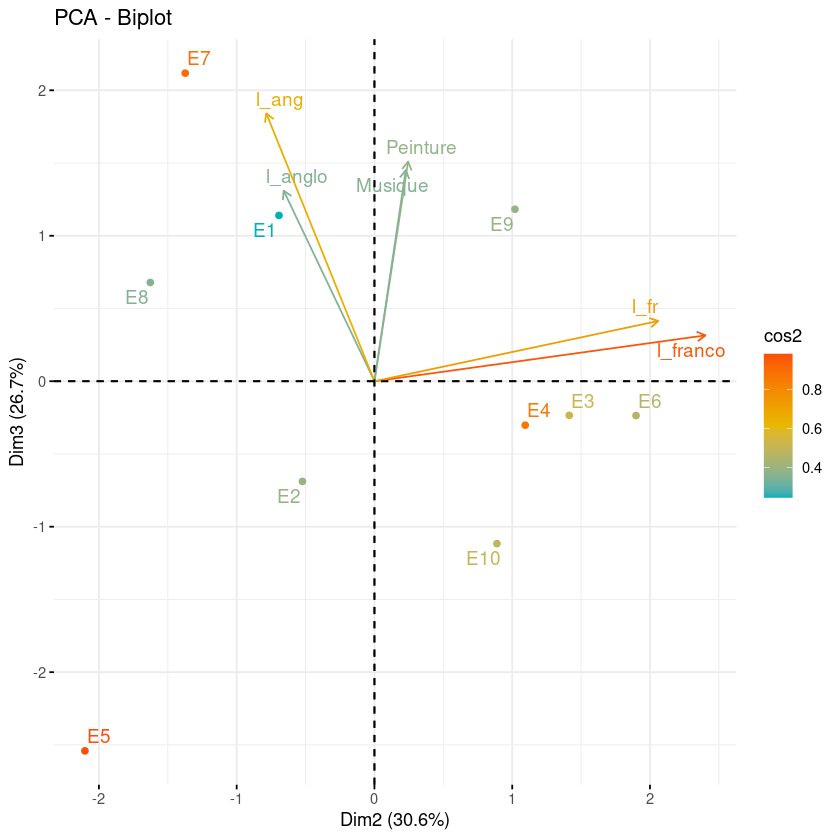

In [45]:
fviz_pca(data.acp,
  col.ind = "cos2",
  col.var = "cos2",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE, axes = c(1, 2)
)
fviz_pca(data.acp,
  col.ind = "cos2",
  col.var = "cos2",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE, axes = c(1, 3)
)
fviz_pca(data.acp,
  col.ind = "cos2",
  col.var = "cos2",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE, axes = c(2, 3)
)

Ces figures vont nous aider a grouper les étudiants et répondre au questions qu'on a poser dans l’introduction dans le chapitre suivant.

# **Groupement et Conclusion**


Comme conclusion et d’après tous ce qu'on a vu, on peut maintenant donner les résultats de notre ACP :

  - Pour les variables qui ont des fortes corrélation, on voit que les individus qui ont une bonnes notes dans l'une de ces variables, ils ont aussi une bonne note dans l'autre, sauf pour les individus qui ont une mal représentation.

  - Les individus qui ont une mal représentation sont les individus qui ont une faible contribution dans les composantes, d'une autre manière, ils ont des notes stable et moyenne dans tous les matières.

  - On peut grouper les individus par leurs notes de la manière suivante :

    1. Group 1 : Il constitue des individus E1 et E9, ils sont caractérisé par des bonne notes en Peinture et Musique et des notes moyennes dans le reste.
    2. Group 2 : Il constitue des individus E3, E4 et E6, ils sont caractérisé par des bonne notes en la littérature francophone et française et des notes moyennes dans le reste.
    3. Group 3 : Il constitue des individus E7, E8, ils sont caractérisé par des bonne notes en la littérature anglophone et anglais et des notes moyennes dans le reste.
    4. Group 4 : Il constitue des individus E2, E10, ils sont caractérisé par une mal représentation, des notes moyennes dans tous les matières
    5. Group 5 : Il constitue de l'individu E5 qui a des mal notes dans toutes les matières.
